## Clustering: "Search by Face Expression"

Let's say you wanted to look up GIFs with the same facial expression as the one you're making. But you don't know how to describe in that expression in words/symbols. This challenge is similar to Google's "search by image" feature.

In this exercise, you'll learn about **clustering**. Remember how we previously plotted songs onto an axis? We can go even further and automatically create clusters or groups of similar pieces of data. 

One way to solve this problem is with the following steps:

- Step 1: Cluster the images into groups
- Step 2: Consider your "search" face and see to which cluster it's closest 
- Step 3: Show the cluster's images to the user

We'll do an example here where we cluster facial expressions. 

Let's start by taking this dataset, called the CK+ (Cohn Kanade) dataset. The images look as below:

|   |   |   |   |   |
|---|---|---|---|---|
|  <img width="120px" src="img/S078_005_00000013.png"> |  <img width="120px" src="img/S088_004_00000011.png">  | <img width="120px" src="img/S094_004_00000012.png">  |  <img width="120px" src="img/S098_004_00000012.png"> | <img width="120px" src="img/S112_001_00000020.png">  |

By the way, we say that **clustering** is an **unsupervised** machine learning technique; in other words, we don't need labels. Just the data! Imagine how we learn concepts before learning language.


## Features

As usual in classic machine learning, we need to extract relevant *features* on our data to work with it. Good *features* represent the raw data in a concise and relevant way.

One way that researchers have found to represent facial expressions is to use [Action Units (AU's)](https://en.wikipedia.org/wiki/Facial_Action_Coding_System "Action Units"). These are things like "nose wrinkler" or "lip pucker" or "inner brow raiser". These are values from 0 (minimal intensity) to 1 (maximal intensity).

**Example**
The following features corresponds to the image below. 
Note: the feature extraction step, converting from image to this feature data, is outside the scope of today's workshop.



<img align="right" width="200px" src="img/S112_001_00000020.png"> 
-    AU1 - Inner brow raiser
-    AU2 - Outer brow raiser
-    AU5b - Upper lid raiser (slight)
-    AU17 - Chin raiser
-    AU22 - Lip funneler

And then, this one is:

<img align="right" width="200px" src="img/S094_004_00000012.png">
- AU6 - Cheek raiser
- AU12 - Lip corner puller
- AU25 - Lips part



And this one:

<img align="right" width="200px" src="img/S158_002_00000011.png">
- AU12 - Lip corner puller
- AU14 - Dimpler
- AU17 - Chin raiser

We'll get back to the Similar Images problem in a bit. For now let's learn the K-Means Clustering algorithm, using an example from before.

## How to group similar expressions using K-Means Clustering

K-Means is a clustering algorithm. It's called K-Means because it tries to make K clusters by calculating means. 

Let's start with a simple example with only 2 features, the music dataset with tempo and acousticness.

## Load and pre-process the data

In [3]:
import pandas
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Import the data
raw_data = pandas.read_csv('data/spotify.csv')  # Top 2017 songs of 2017 from kaggle.com
dataset = pandas.DataFrame(raw_data, columns = ['tempo', 'acousticness', 'song_title', 'artist'])
dataset = dataset[:20]  # Let's just get the top 20 songs

# Perform Normalization [0,1]
tempo_column = dataset[['tempo']].values.astype(float)
tempo_scaler = MinMaxScaler().fit(tempo_column)
tempo_scaled = tempo_scaler.transform(tempo_column)
dataset['tempo_normalized'] = pandas.DataFrame(tempo_scaled)

acoustic_column = dataset[['acousticness']].values.astype(float)
acoustic_scaler = MinMaxScaler().fit(acoustic_column)
acousticness_scaled = acoustic_scaler.transform(acoustic_column)
dataset['acoustic_normalized'] = pandas.DataFrame(acousticness_scaled)

dataset

,tempo,acousticness,song_title,artist,tempo_normalized,acoustic_normalized
0,150.062,0.01020,Mask Off,Future,0.758064,0.013490
1,160.083,0.19900,Redbone,Childish Gambino,0.859327,0.327153
2,75.044,0.03440,Xanny Family,Future,0.000000,0.053695
3,86.468,0.60400,Master Of None,Beach House,0.115441,1.000000
4,174.004,0.18000,Parallel Lines,Junior Boys,1.000000,0.295587
5,85.023,0.00479,Sneakin’,Drake,0.100839,0.004502
6,80.030,0.01450,Childs Play,Drake,0.050384,0.020634
7,144.154,0.02020,Gyöngyhajú lány,Omega,0.698363,0.030104
8,130.035,0.04810,I've Seen Footage,Death Grips,0.555689,0.076455
9,99.994,0.00208,Digital Animal,Honey Claws,0.252122,0.000000


## Perform K-Means Clustering on the Data

In [5]:
# Convert DataFrame to matrix
features = pandas.DataFrame(dataset, columns = ['tempo_normalized', 'acoustic_normalized'])
mat = features.values

# Use sklearn
km = KMeans(n_clusters=3)
km.fit(mat)

# Get cluster assignment labels
dataset['cluster'] = km.labels_
dataset

,tempo,acousticness,song_title,artist,tempo_normalized,acoustic_normalized,cluster
0,150.062,0.01020,Mask Off,Future,0.758064,0.013490,2
1,160.083,0.19900,Redbone,Childish Gambino,0.859327,0.327153,2
2,75.044,0.03440,Xanny Family,Future,0.000000,0.053695,0
3,86.468,0.60400,Master Of None,Beach House,0.115441,1.000000,1
4,174.004,0.18000,Parallel Lines,Junior Boys,1.000000,0.295587,2
5,85.023,0.00479,Sneakin’,Drake,0.100839,0.004502,0
6,80.030,0.01450,Childs Play,Drake,0.050384,0.020634,0
7,144.154,0.02020,Gyöngyhajú lány,Omega,0.698363,0.030104,2
8,130.035,0.04810,I've Seen Footage,Death Grips,0.555689,0.076455,2
9,99.994,0.00208,Digital Animal,Honey Claws,0.252122,0.000000,0


## Visualize the results

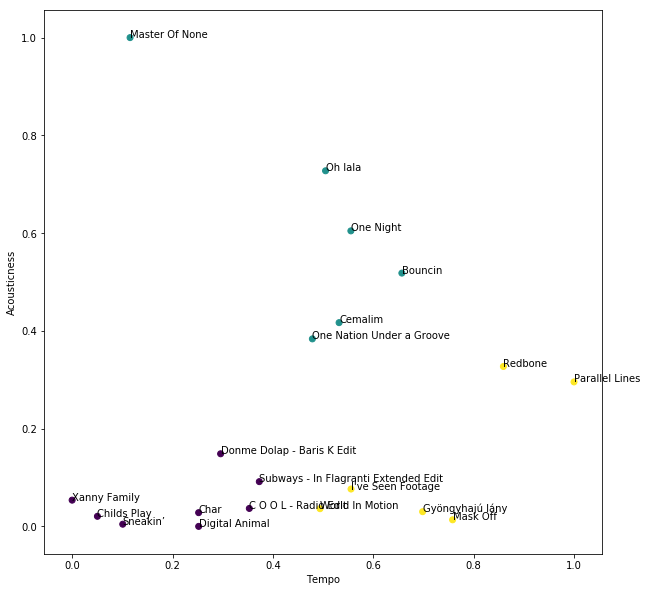

In [6]:
# Now let's visualize that by plotting all the original data points
plot.rcParams["figure.figsize"] = 10,10

plot.scatter(features['tempo_normalized'], features['acoustic_normalized'], c=km.labels_)
plot.xlabel('Tempo')
plot.ylabel('Acousticness')

for index, row in dataset.iterrows():
    plot.annotate(unicode(row['song_title'], 'utf-8'), xy=(row['tempo_normalized'], row['acoustic_normalized']))

Now let's do some clustering on our face dataset.
